In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [4]:
# Load the dataset (Update path as necessary)
file_path = "movie_metadata.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Display dataset information
df.info()
df.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:
# Selecting only numeric columns
df = df.drop(columns=['imdb_score'])
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns]

# Handling missing values by filling with median
df_numeric = df_numeric.fillna(df_numeric.median())

# Display cleaned numeric data
df_numeric.head(20)
df_numeric.to_csv("cleaned_movie_data.csv", index=False)

In [6]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame for better readability
df_cleaned = pd.DataFrame(df_scaled, columns=numeric_columns)
df_cleaned.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,4.818166,2.814615,-0.241750,0.127161,-0.369901,11.408309,5.795674,-0.267871,-0.681406,7.374009,1.016877,0.524551,-0.176616,-0.335116,1.318632
1,1.339466,2.456882,-0.039622,0.214449,2.228320,4.221336,2.798784,2.128121,-0.681406,2.560001,1.338521,0.362535,0.830027,0.090444,-0.389572
2,3.818349,1.622174,-0.241750,-0.290615,0.296310,2.479486,1.388010,0.110172,-0.184108,1.913185,1.057721,1.010598,-0.311116,0.090444,4.010348
3,5.561831,2.258142,7.656689,13.458069,1.362246,6.431533,7.659834,5.344122,-0.681406,6.438246,1.083248,0.767575,5.288586,0.090444,8.099687
4,-0.247020,-0.166488,-0.194719,-0.163897,-0.427795,-0.301558,-0.604169,-0.526157,-0.681406,-0.308257,-0.091008,0.200520,-0.405489,0.090444,-0.389572


In [7]:
import numpy as np
from sklearn.decomposition import PCA

# PCA with n_components=2
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df_scaled)

# PCA with n_components=3
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df_scaled)

# Explained variance for 2D and 3D PCA
explained_variance_2d = np.cumsum(pca_2d.explained_variance_ratio_)[-1] * 100  # Convert to percentage
explained_variance_3d = np.cumsum(pca_3d.explained_variance_ratio_)[-1] * 100  # Convert to percentage

# Print variance retained
print(f"Variance Retained (2D PCA): {explained_variance_2d:.2f}%")
print(f"Variance Retained (3D PCA): {explained_variance_3d:.2f}%")


Variance Retained (2D PCA): 42.23%
Variance Retained (3D PCA): 51.02%


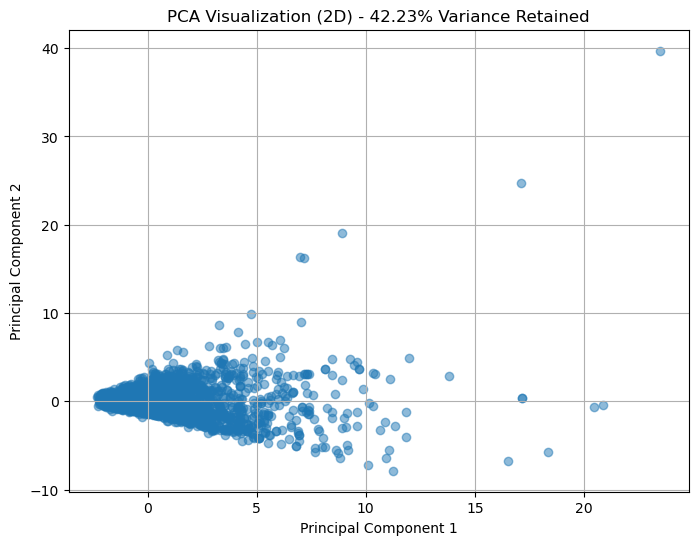

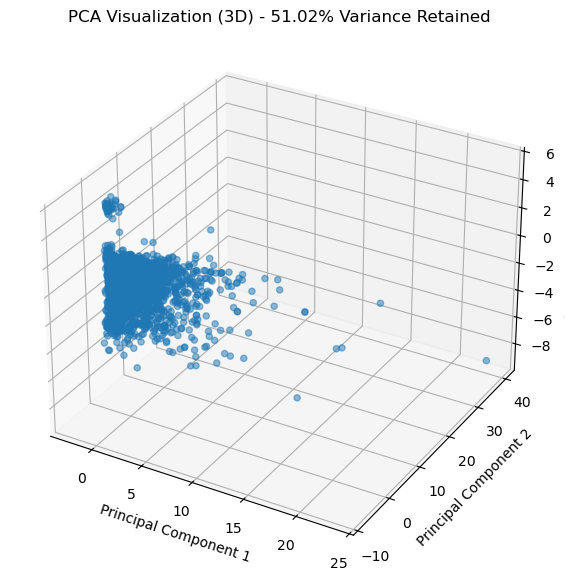

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"PCA Visualization (2D) - {explained_variance_2d:.2f}% Variance Retained")
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], alpha=0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"PCA Visualization (3D) - {explained_variance_3d:.2f}% Variance Retained")
plt.show()


In [13]:
# Perform PCA with enough components to capture 95% variance
pca_full = PCA(n_components=len(df_numeric.columns))
pca_full.fit(df_scaled)

# Find number of components to retain at least 95% variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to retain 95% variance: {num_components_95}")


Number of components needed to retain 95% variance: 12


In [14]:
# Extract top three eigenvalues
top_eigenvalues = pca_full.explained_variance_[:3]

print(f"Top 3 Eigenvalues: {top_eigenvalues}")


Top 3 Eigenvalues: [4.32497852 2.01130764 1.31766318]


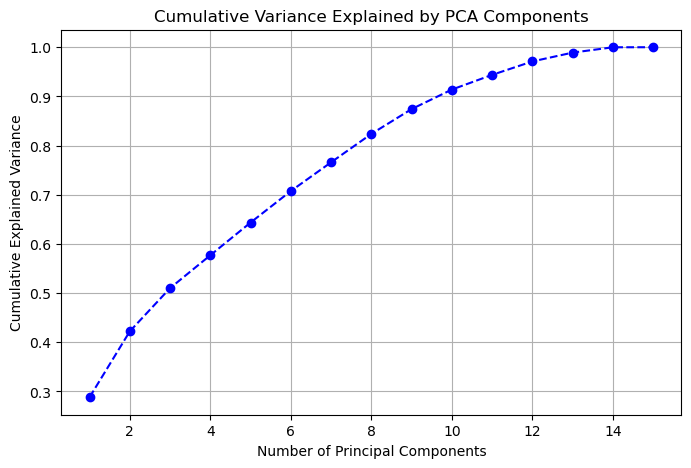

Cumulative Explained Variance:
    Principal Component  Cumulative Variance
0                     1             0.288275
1                     2             0.422335
2                     3             0.510162
3                     4             0.577032
4                     5             0.643566
5                     6             0.707605
6                     7             0.766059
7                     8             0.823805
8                     9             0.874278
9                    10             0.913959
10                   11             0.943827
11                   12             0.971141
12                   13             0.989067
13                   14             0.999888
14                   15             1.000000


In [16]:
#Compute cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA Components")
plt.grid()
plt.show()

# Print cumulative variance values
print("Cumulative Explained Variance:")
print(pd.DataFrame({"Principal Component": range(1, len(cumulative_variance) + 1),
                     "Cumulative Variance": cumulative_variance}))

In [13]:

pca_2d_df = pd.DataFrame(pca_2d_result, columns=['PC1', 'PC2'])  # Convert to DataFrame
print(pca_2d_df.head(15))  # Now this will work


pca_3d_df = pd.DataFrame(pca_3d_result, columns=['PC1', 'PC2', 'PC3'])
print(pca_3d_df.head(15))


          PC1       PC2
0   11.248999 -7.852593
1    5.811186 -0.496887
2    5.068954 -3.045474
3   20.876871 -0.391796
4   -1.144617 -0.279752
5    2.191193 -2.059468
6    7.080999 -0.599463
7    2.119055 -1.973328
8   13.824811  2.883843
9    7.202537  1.804335
10  11.077770 -5.515177
11   5.651669 -1.604173
12   2.642290 -2.523233
13   7.073725 -1.140302
14   4.196895  0.367492
          PC1       PC2       PC3
0   11.248999 -7.852593 -0.305307
1    5.811186 -0.496887 -1.382419
2    5.068954 -3.045474  1.986845
3   20.876871 -0.391796 -0.246765
4   -1.144617 -0.279752  0.208412
5    2.191193 -2.059468  1.066847
6    7.080999 -0.599463 -0.936969
7    2.119055 -1.973328  1.154982
8   13.824811  2.883843  2.293566
9    7.202537  1.804335 -0.234184
10  11.077770 -5.515177  2.683076
11   5.651669 -1.604173 -1.041355
12   2.642290 -2.523233  0.527947
13   7.073725 -1.140302 -1.178710
14   4.196895  0.367492  0.611418
